## Topic 1. Introduction to Machine learning
## Supervised Classification: Linear models


In [1]:
# We start by importing the python libraries required to solve the exercises

import numpy as np
import matplotlib
#from matplotlib import pylab as plt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

# Enables interactivity with the plots
%matplotlib notebook

The scikit-learn version is 0.18.1.


In [2]:
# We create two sets of points (XA,yA)  and (XB,yB) corresponding to two different classes

# Font size
fsize = 20     

# Points in Class A
xA = 20*np.random.rand(50)
shiftA = 20*np.random.rand(50)
yA = xA/2.0 - shiftA - 0.1


# Points in Class B
xB = 20*np.random.rand(50)
shiftB = 20*np.random.rand(50)
yB = xB/2.0 + shiftB + 0.1


<IPython.core.display.Javascript object>


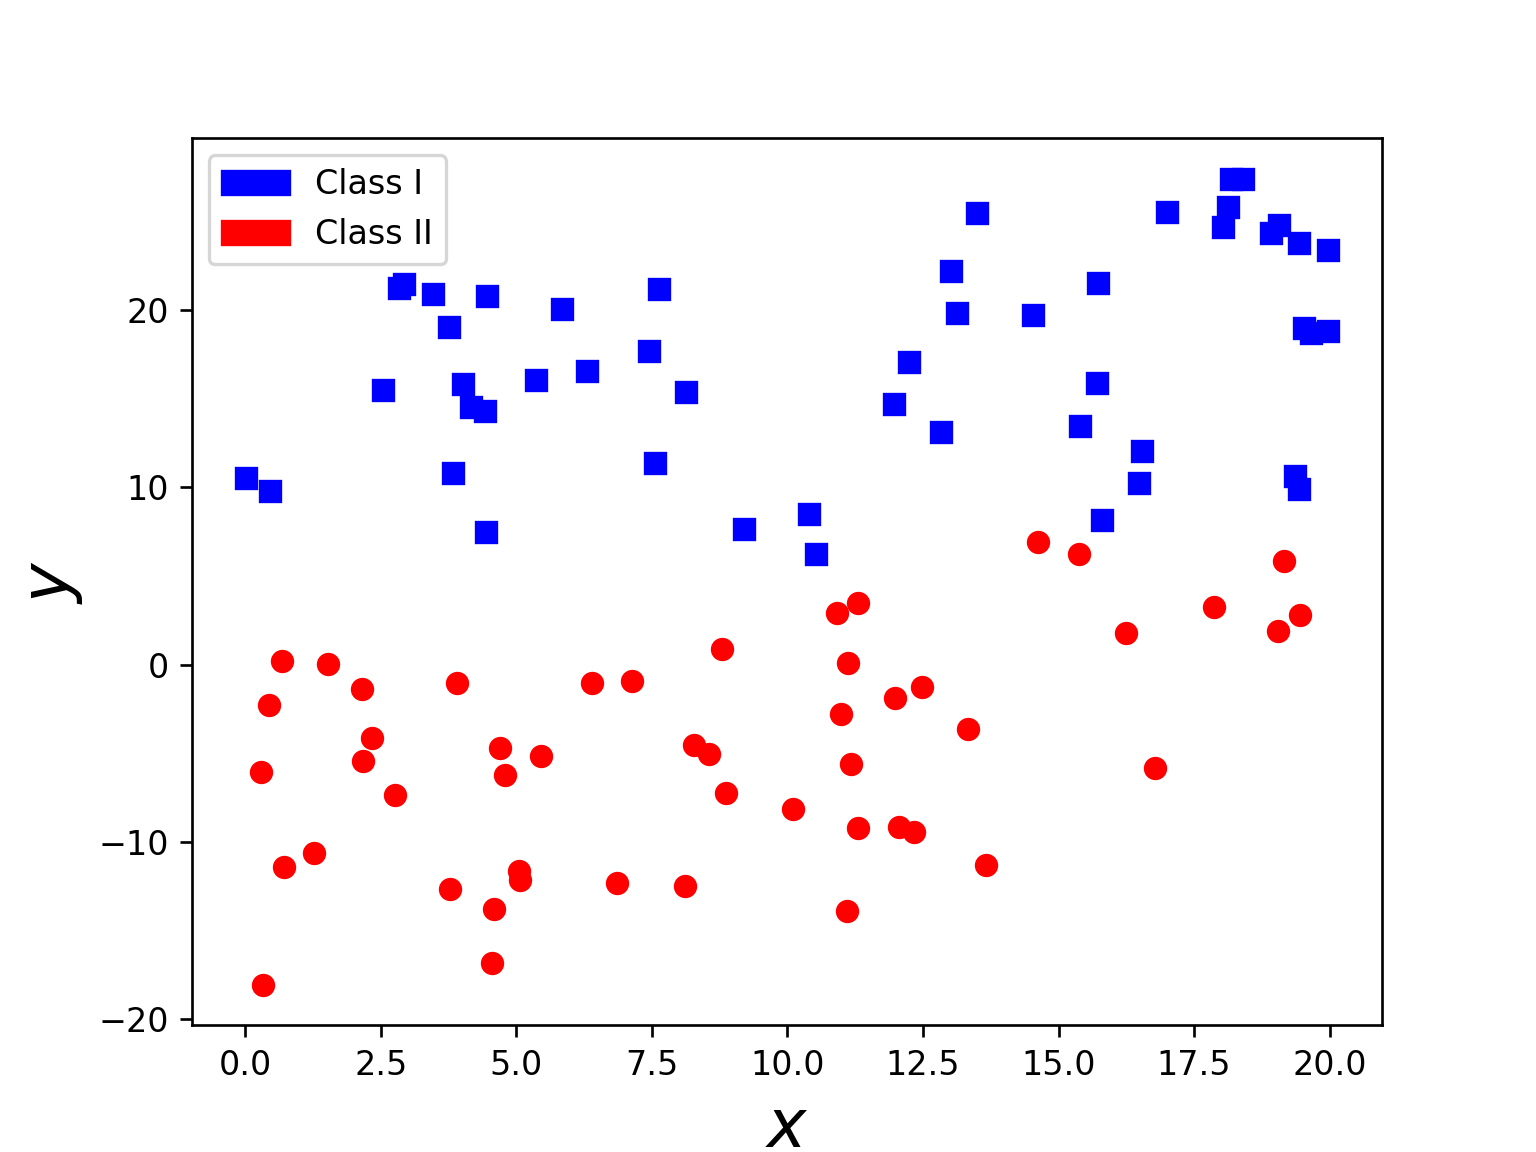

In [3]:
# The points in the two classes are visualized with different colors 
# Points in Class I in blue. Points in Class II in red

plt.figure()
plt.plot(xA, yA, 'ro')
plt.plot(xB, yB, 'bs')

blue_patch = mpatches.Patch(color='blue', label='Class I')
red_patch = mpatches.Patch(color='red', label='Class II')
plt.legend(handles=[blue_patch,red_patch])

plt.xlabel(r'$x$', fontsize=fsize)
plt.ylabel(r'$y$', fontsize=fsize)


plt.show()

<IPython.core.display.Javascript object>


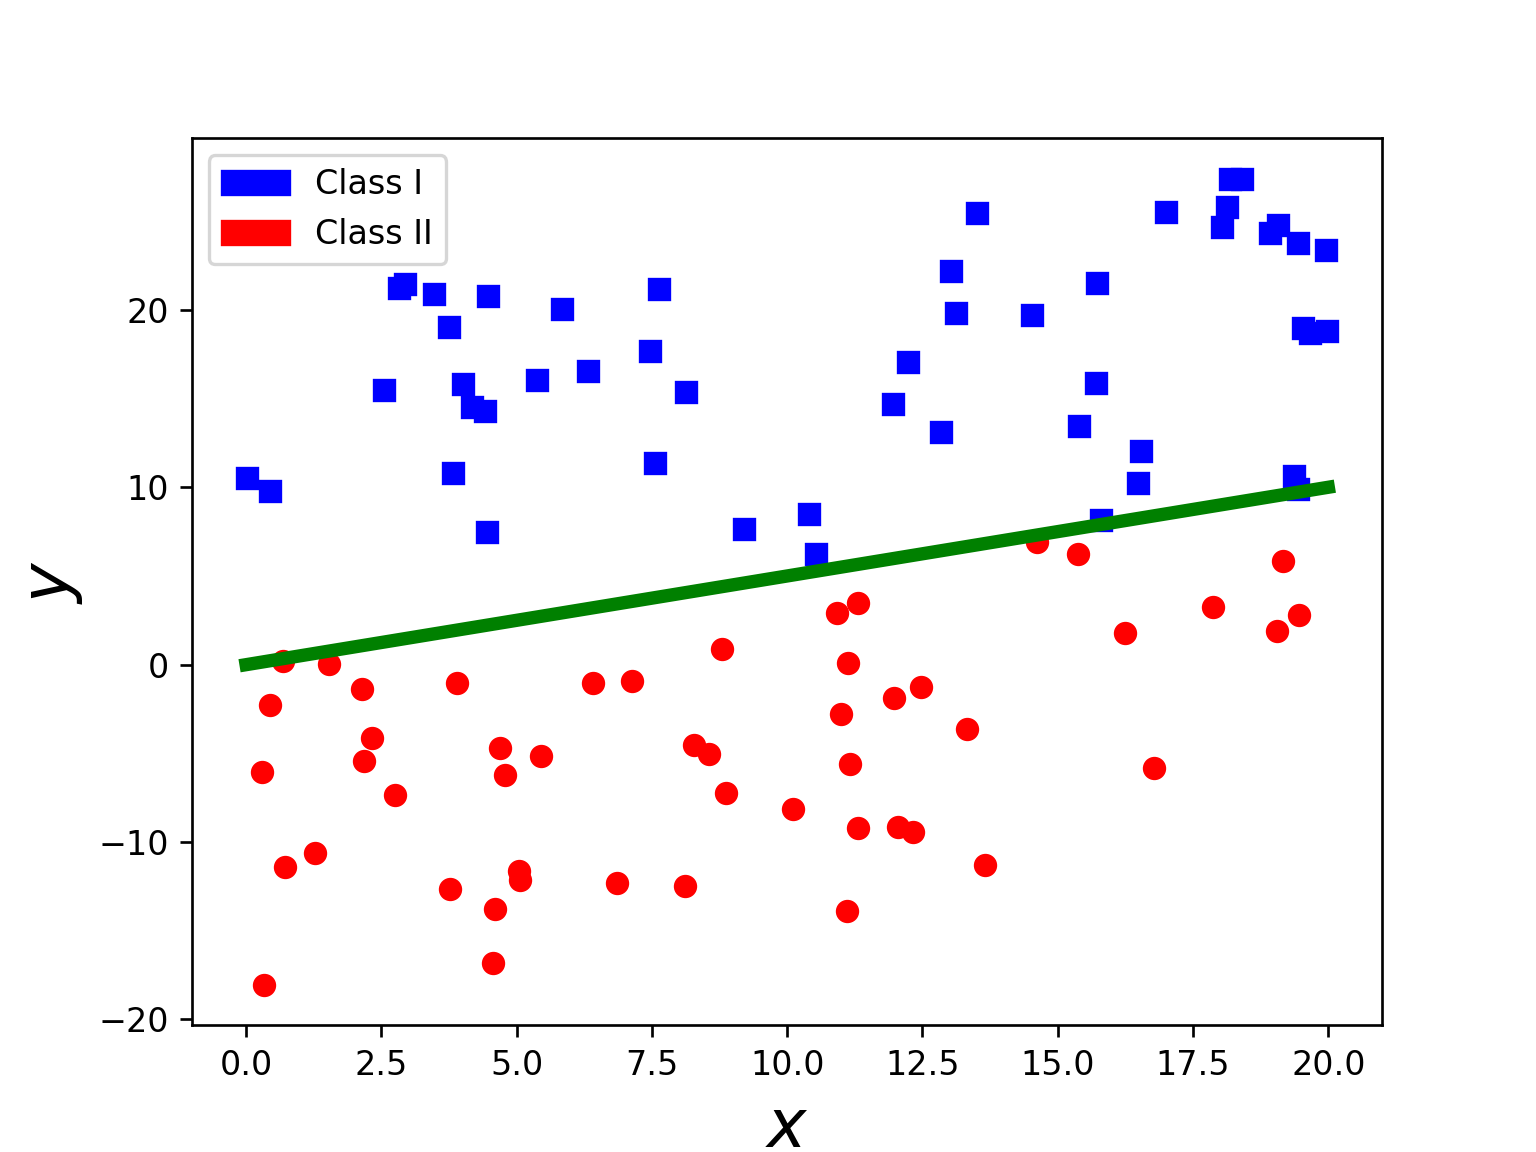

In [4]:
# We show that there exists a hyperplane that allows to perfectly divides
# points in the two classes.
# In 2-d this hyperplane corresponds to a line that is represented in green.


x1 = np.linspace(0, 20, 2000)
y1 = x1/2.0

plt.figure()

plt.plot(xA, yA, 'ro')
plt.plot(xB, yB, 'bs')

blue_patch = mpatches.Patch(color='blue', label='Class I')
red_patch = mpatches.Patch(color='red', label='Class II')
plt.legend(handles=[blue_patch,red_patch])

plt.xlabel(r'$x$', fontsize=fsize)
plt.ylabel(r'$y$', fontsize=fsize)


# Show hyperplane dividing the classes
plt.plot(x1, y1,'g', lw=4)
plt.show()


 Let us try to learn a linear regression model that approximates all the points, regardless the  classes they belong to.

In [5]:
# We import the linear function from sklearn
from sklearn.linear_model import LinearRegression


# We define the linear regression model

 # W = w1 * x1 + w0
 # coeficient = w1 + x1
 # coeficient = -w0

lr = LinearRegression(fit_intercept=True, normalize=True)


Now we will learn the model. In this case what we want is a regression model for ALL the points. The regression model should predict, given a value of x, what will be the y value.

In [6]:
# We define our set of observations (the union of points from the two classes)
# We concatenate the vectors
x = np.hstack((xA,xB)).reshape(-1,1)
y = np.hstack((yA,yB)).reshape(-1,1)
print(x.shape,y.shape)

# We fit the linear model to the data
# This produces the linear regression model (Object lr is updated)
lr.fit(x,y)

# We print the coefficient and the intercept of the linear model
# Most probably they are different to the coefficient and intercept of the original hyperplane (0.5 and 0, respectively)

#parameters the models needs to learn to plot a line
print("The coefficients associated to x in the regression model is: "+str(lr.coef_[0][0])+". The intercept value  is : "+str(lr.intercept_[0])+".")


(100, 1) (100, 1)
The coefficients associated to x in the regression model is: 0.810605189303. The intercept value  is : -1.8555975627.


Finally, we will used the linear regression model to predict the y values, given the x values. 


 We will use the model to predict in the same dataset (x) used to learn  the model. In general, this is not a good practice since it can give a poor estimation  of the generalization of the solutions. A better practice is to learn in one training set and testing using a different one


In [7]:
# We predict the new values using the model
y_l_predicted = lr.predict(x)


The following chart will display, the points from the two classes, the original hyperplane (in green) and the prediction produced by the regression model (in magenta). Notice that even if the decision function learned by the linear model and the original hyperplanes have different equations, the are both good decision functions. At least for the training data!!!


<IPython.core.display.Javascript object>


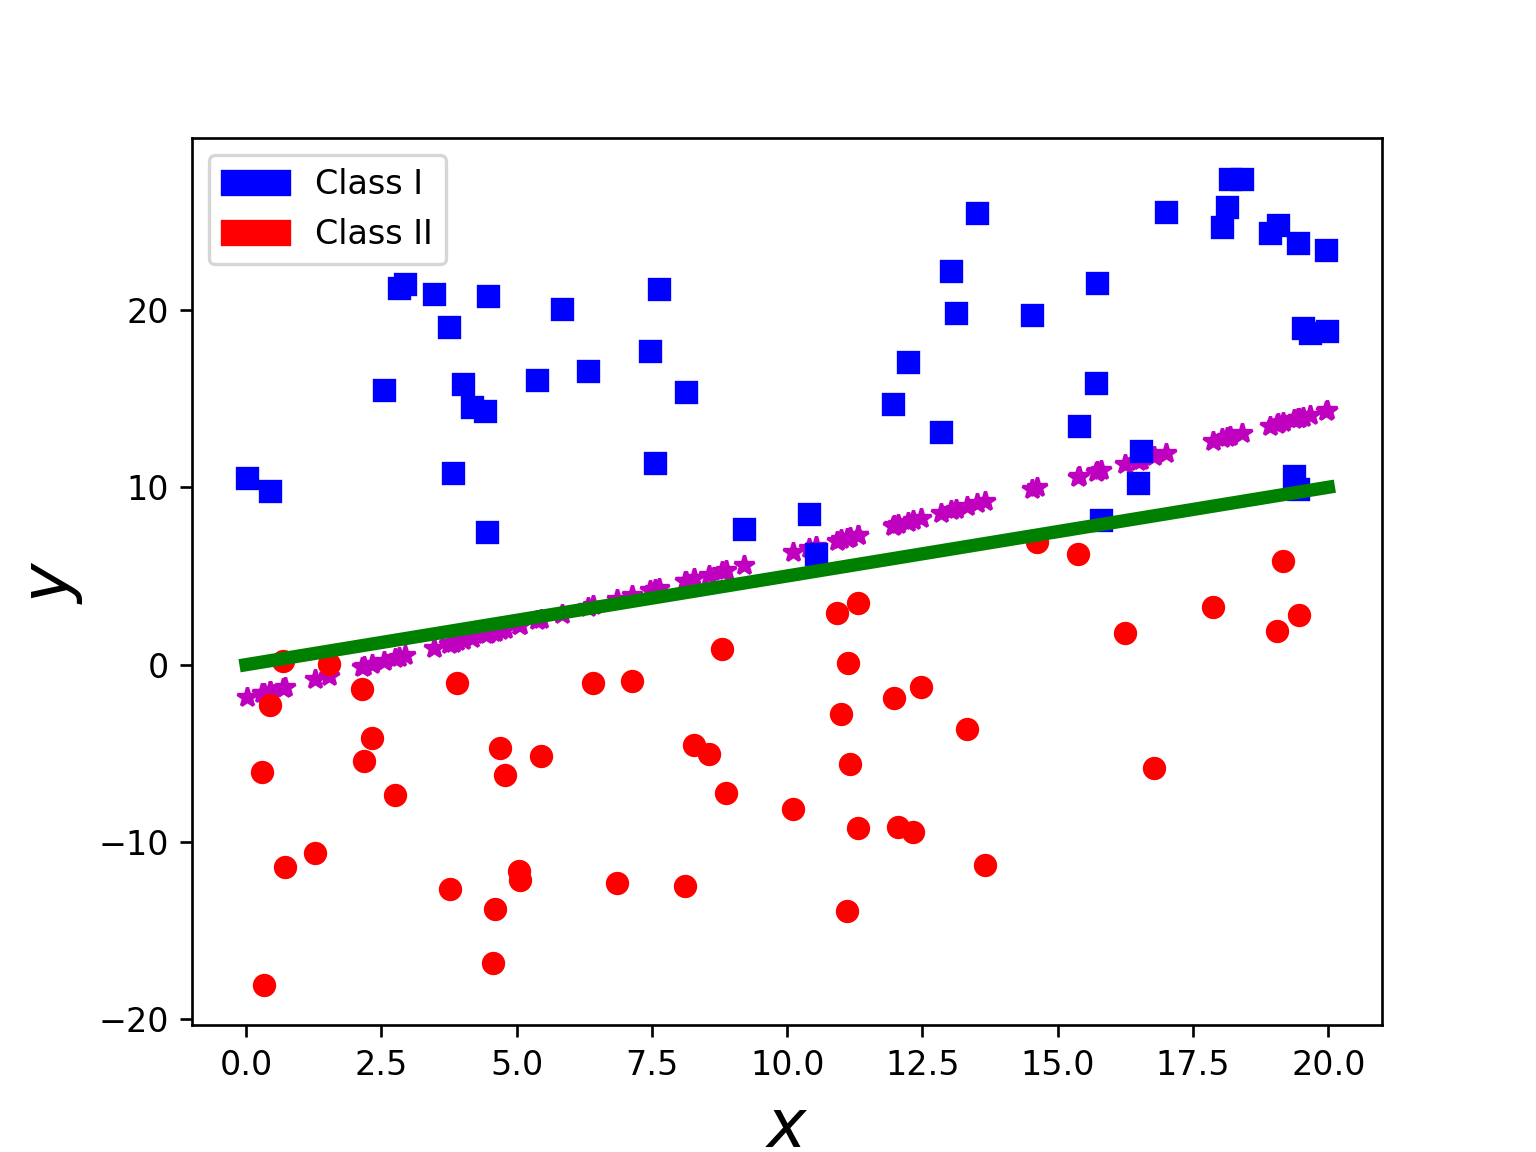

In [8]:
plt.figure()
plt.plot(x,y_l_predicted,'m*', lw=4)
plt.plot(xA, yA, 'ro', lw=4)
plt.plot(xB, yB, 'bs', lw=4)
plt.plot(x1, y1,'g', lw=4)

blue_patch = mpatches.Patch(color='blue', label='Class I')
red_patch = mpatches.Patch(color='red', label='Class II')
plt.legend(handles=[blue_patch,red_patch])
plt.xlabel(r'$x$', fontsize=fsize)
plt.ylabel(r'$y$', fontsize=fsize)

plt.show()

Now we consider the LinearDiscriminant Analysis Classifier.

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np

# The classifier is defined
#llda = LinearDiscriminantAnalysis(solver='lsqr')
llda = LinearDiscriminantAnalysis(solver='svd')

Since this is a classifier (not a regressor). We will need to define our features, and to specify the classes.


In [10]:
# We will assign value -1 to the points in the first class, and value 1 to points in the second class.
# Usually, classes can be also assigned values 0 and 1. 
# The dependent or class variable will be "y_binary"
y_binary = np.hstack((-1*np.ones((50)),np.ones((50))))

# Now we define our features. We will use as features the coordinates of each point (x,y)
# Notice the difference with regression where "y" was a dependent variable. Here "y" is an independent variable as x.
# The matrix containing the 100 observations will be: enlarged_x

enlarged_x = np.hstack((x,y))

We learn the LDA model. This means that the parameters of the linear model (the coefficients and the intercept are learned from the data.)

In [11]:
llda.fit(enlarged_x,y_binary)


# as we have 2 input (x, y), we need 3 parameters
print("The coefficients associated to x in the LDA model is: "+str(llda.coef_[0][0])+", and to y is: "
      +str(llda.coef_[0][1]) +". The intercept value is :"+str(llda.intercept_[0])+".")



The coefficients associated to x in the LDA model is: -0.184782424473, and to y is: 0.677157807321. The intercept value is :-2.36148026054.


Now let us make the prediction using the model. Determine whether the prediction is correct. 

In [12]:
y_llda_predicted = llda.predict(enlarged_x)
print("The class values associated to the points are "+str(y_llda_predicted) )

The class values associated to the points are [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1. -1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In the following cell, weuse the coefficients of the model and the intercept to compute the expression of a line. 
Evaluate the cell. 

<IPython.core.display.Javascript object>


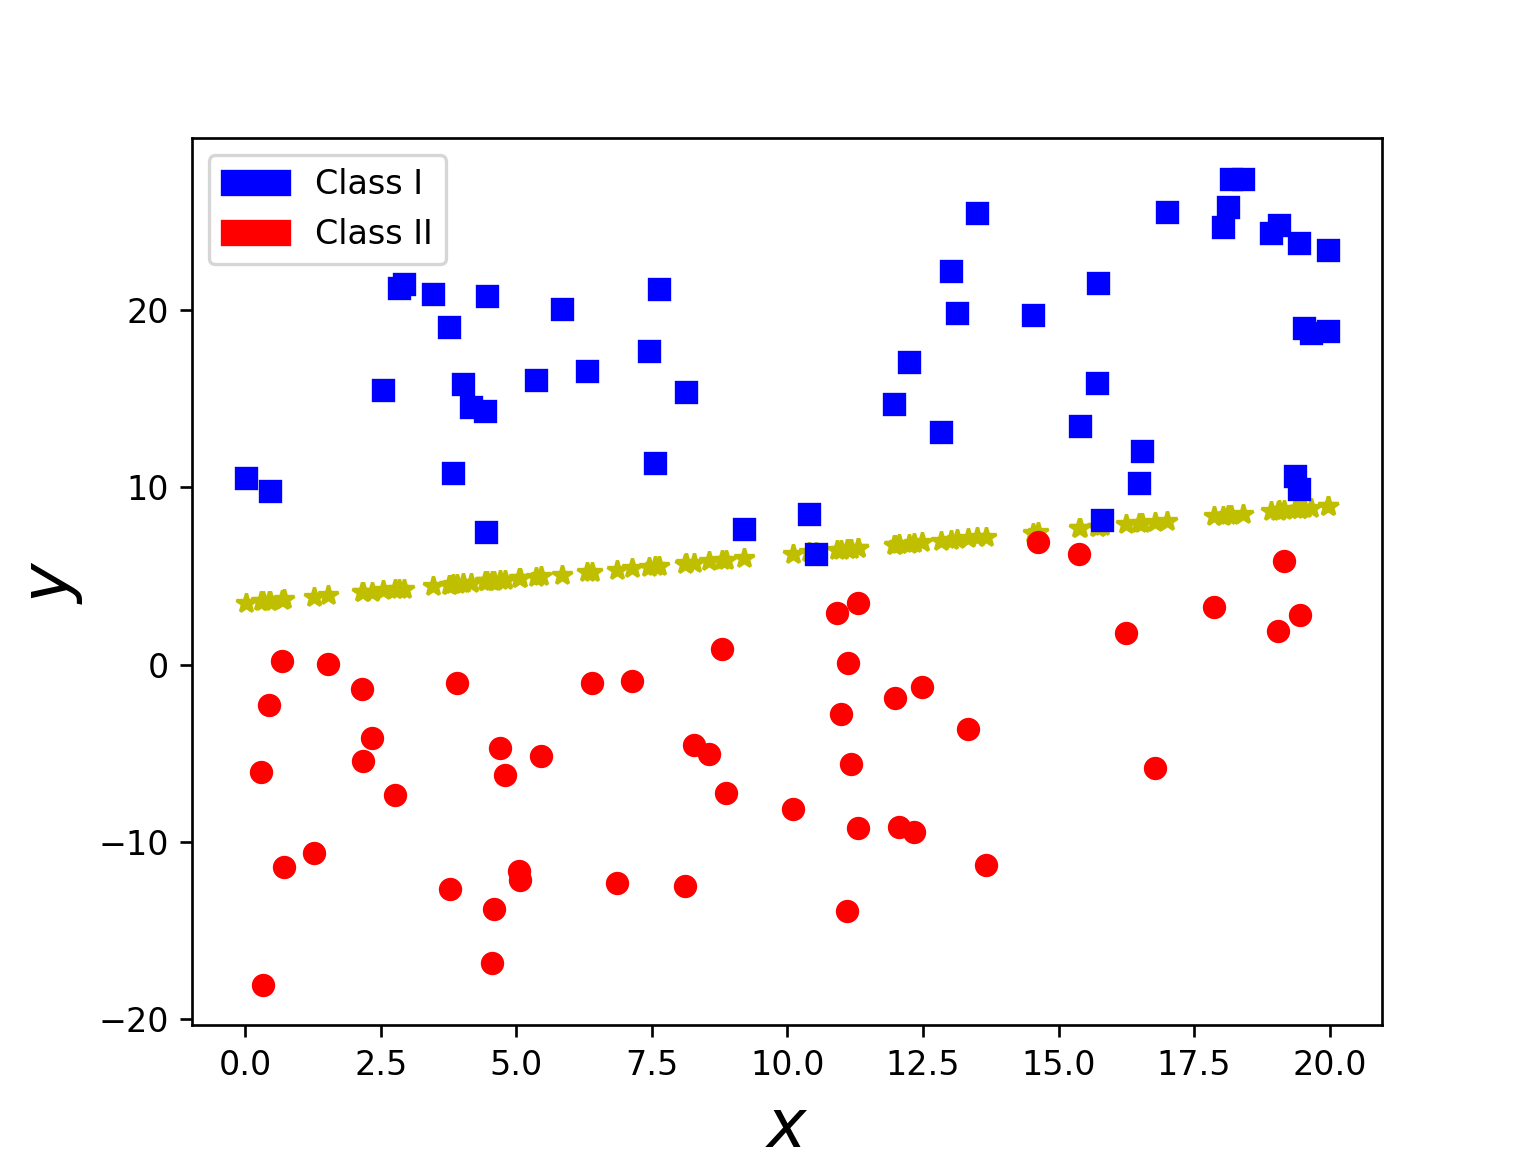

In [13]:
decision_function =  (-llda.intercept_ -llda.coef_[0][0]*x)/llda.coef_[0][1]
#print(llda_line)

plt.figure()
plt.plot(x,decision_function,'y*', lw=4)
plt.plot(xA, yA, 'ro', lw=4)
plt.plot(xB, yB, 'bs', lw=4)
#plt.plot(x1, y1,'g', lw=4)

blue_patch = mpatches.Patch(color='blue', label='Class I')
red_patch = mpatches.Patch(color='red', label='Class II')
plt.legend(handles=[blue_patch,red_patch])
plt.xlabel(r'$x$', fontsize=fsize)
plt.ylabel(r'$y$', fontsize=fsize)

plt.show()


## Exercise 1

It can be appreciated in the chart that the line is a good separator of the two classes. 

1.1) Explain why is this expression a good separator 

1.2) Can you explain how has it been derived?

1.3) Go back to the cell where the LDA model has been defined. Modify the solver to 'svd'. Evaluate all the cells until this exercise and check whether also for this solver the learned model discriminates well between classes.

# Overlapping classes 

Now we create a more difficult classification problem where the two region classes overlap.

In [14]:
# Points in Class A
xA1 = 20*np.random.rand(50)
shiftA1 = 20*np.random.rand(50)
yA1 = (4+xA1)/2.0 - shiftA1 + 5.0

# Points in Class B
xB1 = 20*np.random.rand(50)
shiftB1 = 20*np.random.rand(50)
yB1 = (4+xB1)/2.0 + shiftB1 - 5.0

# Hyperplane dividing the two classes
x1 = np.linspace(0, 20, 2000)
y1 = (4+x1)/2.0

The points corresponding to the two classes are plotted.  We use the same hyperplane to divide points from the two classes. As it can be appreciated, the classification provided by this hyperplane is not perfect

<IPython.core.display.Javascript object>


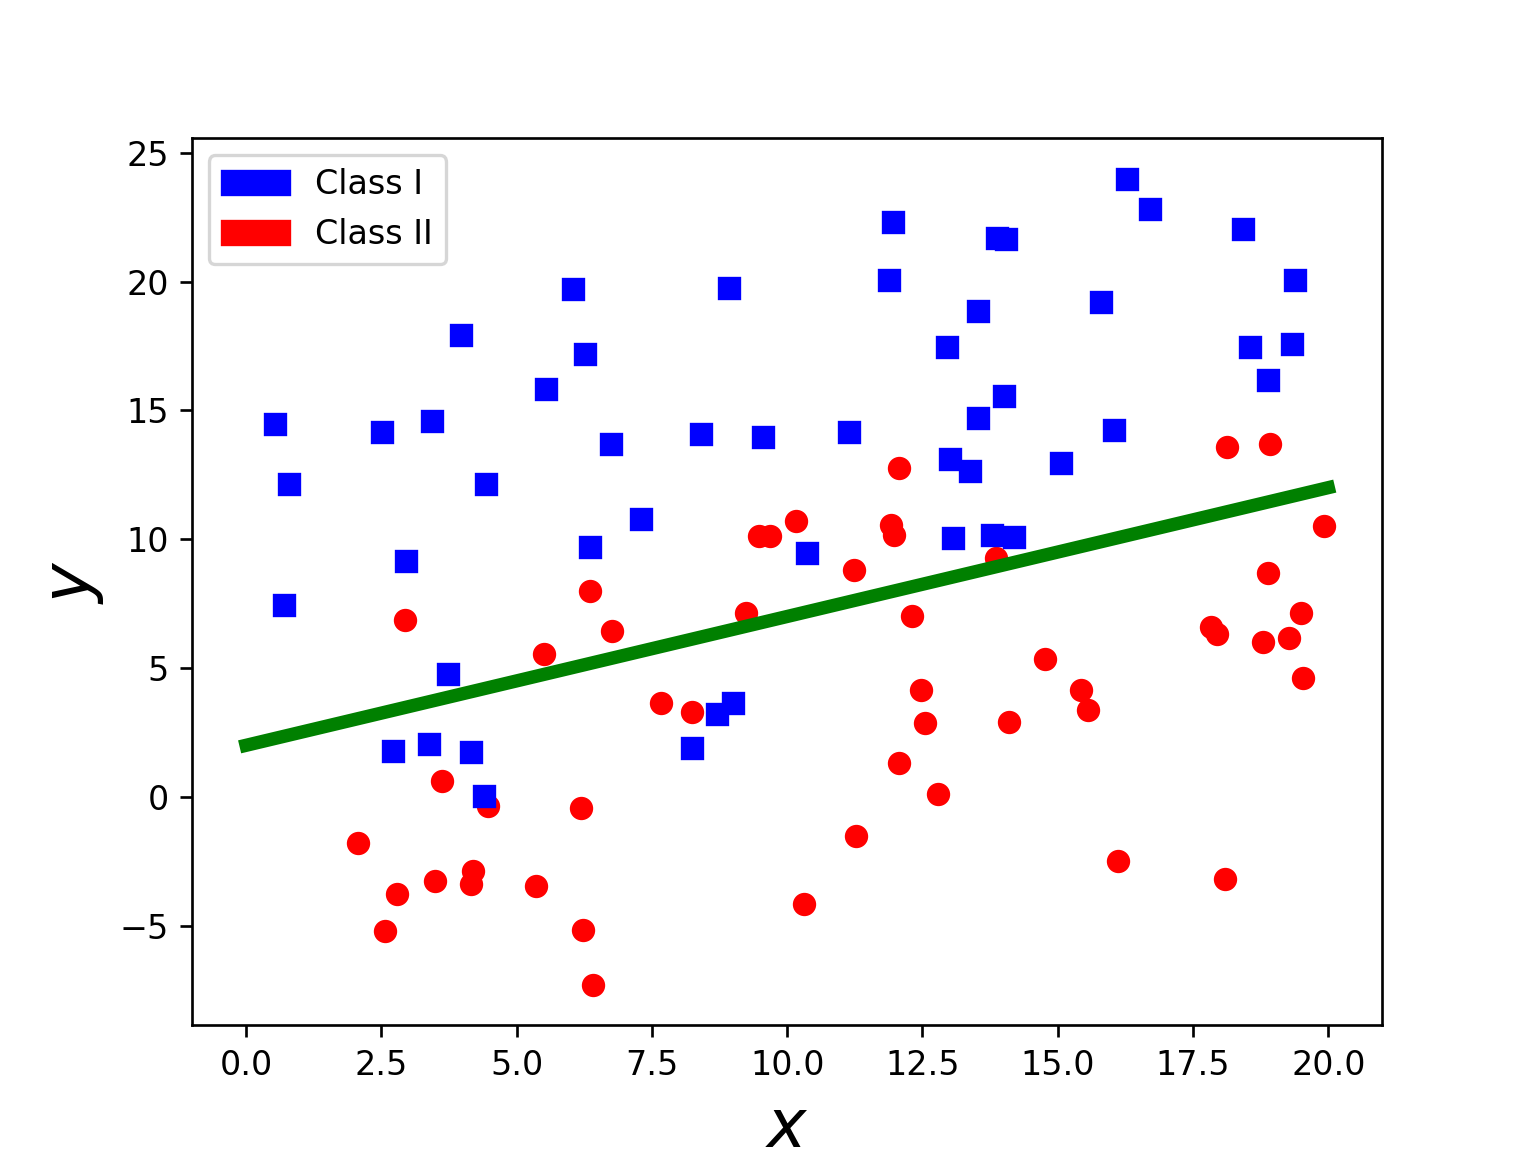

In [15]:
plt.figure()

# Show the points for the new two classes
plt.plot(xA1, yA1, 'ro', lw=4)
plt.plot(xB1, yB1, 'bs', lw=4)

# Show hyperplane dividing the classes
plt.plot(x1, y1,'g', lw=4)

blue_patch = mpatches.Patch(color='blue', label='Class I')
red_patch = mpatches.Patch(color='red', label='Class II')
plt.legend(handles=[blue_patch,red_patch])
plt.xlabel(r'$x$', fontsize=fsize)
plt.ylabel(r'$y$', fontsize=fsize)


plt.show()


We create a more difficult classification problem where the two region classes seem to overlap and where
it is not evident that a linear separator exists.


In [16]:

# Points in Class A
xA2 = 20*np.random.rand(50)
shiftA2 = 20*np.random.rand(50)
yA2 = 20*np.cos(0.2*np.pi*xA2) - shiftA2 

# Points in Class B
xB2 = 20*np.random.rand(50)
shiftB2 = 20*np.random.rand(50)
yB2 = 20*np.cos(0.2*np.pi*xB2) + shiftB2 

# Sinusoidal curve dividing the two classes      
x2 = np.linspace(0, 20, 2000)
y2 = 20*np.cos(0.2*np.pi*x2) 

The points corresponding to the two classes are plotted

<IPython.core.display.Javascript object>


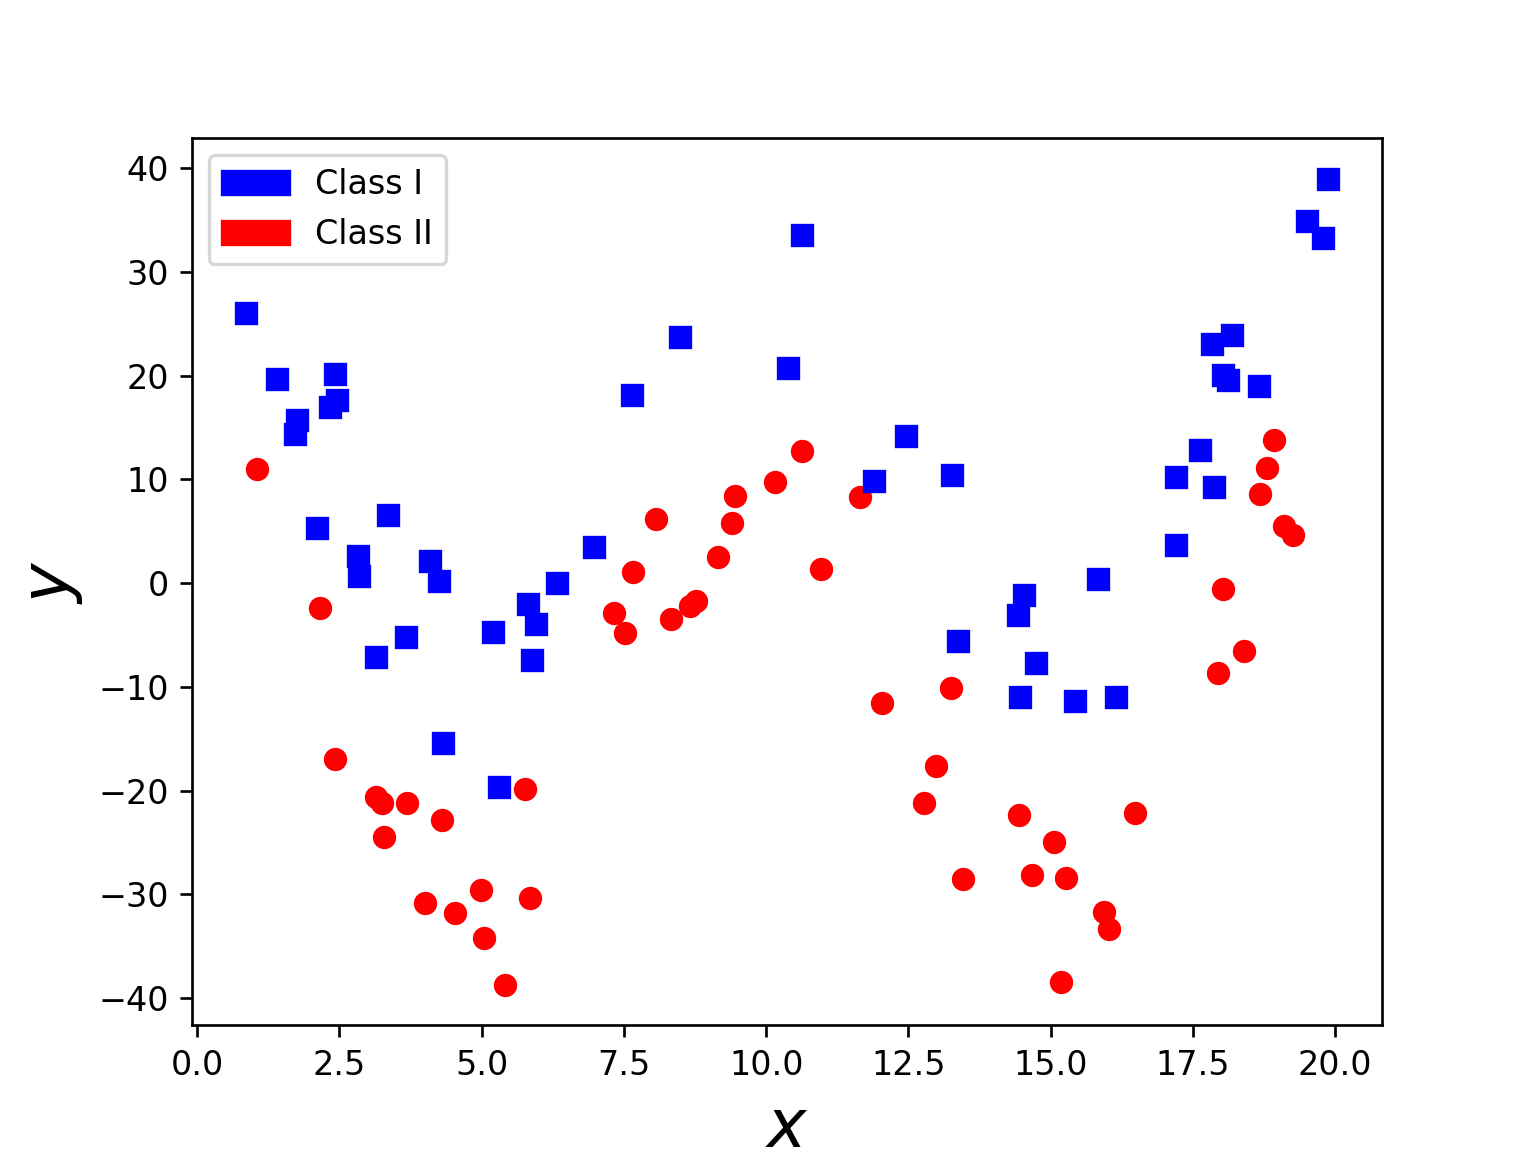

In [17]:
plt.figure()

plt.plot(xA2, yA2, 'ro')
plt.plot(xB2, yB2, 'bs')

blue_patch = mpatches.Patch(color='blue', label='Class I')
red_patch = mpatches.Patch(color='red', label='Class II')
plt.legend(handles=[blue_patch,red_patch])

plt.xlabel(r'$x$', fontsize=fsize)
plt.ylabel(r'$y$', fontsize=fsize)
plt.show()


## Exercise 2

Knowing that the points in the two classes are (xA2, yA2) for Class I;  and (xB2, yB2) for class II.


2.1) Learn a Linear Discriminant Analysis classifier for this data


2.2) Predict the labels using the learned model. 


2.3) Plot the hyplane learned by LDA that divides the two classes.



Suggestion: Go to the previous cells and copy the relevant code for defining, learning and using the classifier for prediction. Paste the cells in the following BLANK cells. You can insert as many new cells as needed but do not delete the context of the next exercises.

In [18]:
llda = LinearDiscriminantAnalysis(solver='lsqr')

In [19]:
y2_binary = np.hstack((-1*np.ones((50)),np.ones((50))))

featuresA = np.hstack((xA2, xB2)).reshape(-1,1)
featuresB = np.hstack((yA2, yB2)).reshape(-1,1)

print(featuresA.shape, featuresB.shape)

enlarged_x2 = np.hstack((featuresA, featuresB))

print(enlarged_x2.shape)

(100, 1) (100, 1)
(100, 2)


In [20]:
llda.fit(enlarged_x2, y2_binary)

print("The coefficients associated to x in the LDA model is: "+str(llda.coef_[0][0])+", and to y is: "
      +str(llda.coef_[0][1]) +". The intercept value is :"+str(llda.intercept_[0])+".")

The coefficients associated to x in the LDA model is: -0.067911502504, and to y is: 0.0954780688518. The intercept value is :0.854622817112.


In [21]:
y_llda_predicted = llda.predict(enlarged_x2)

<IPython.core.display.Javascript object>


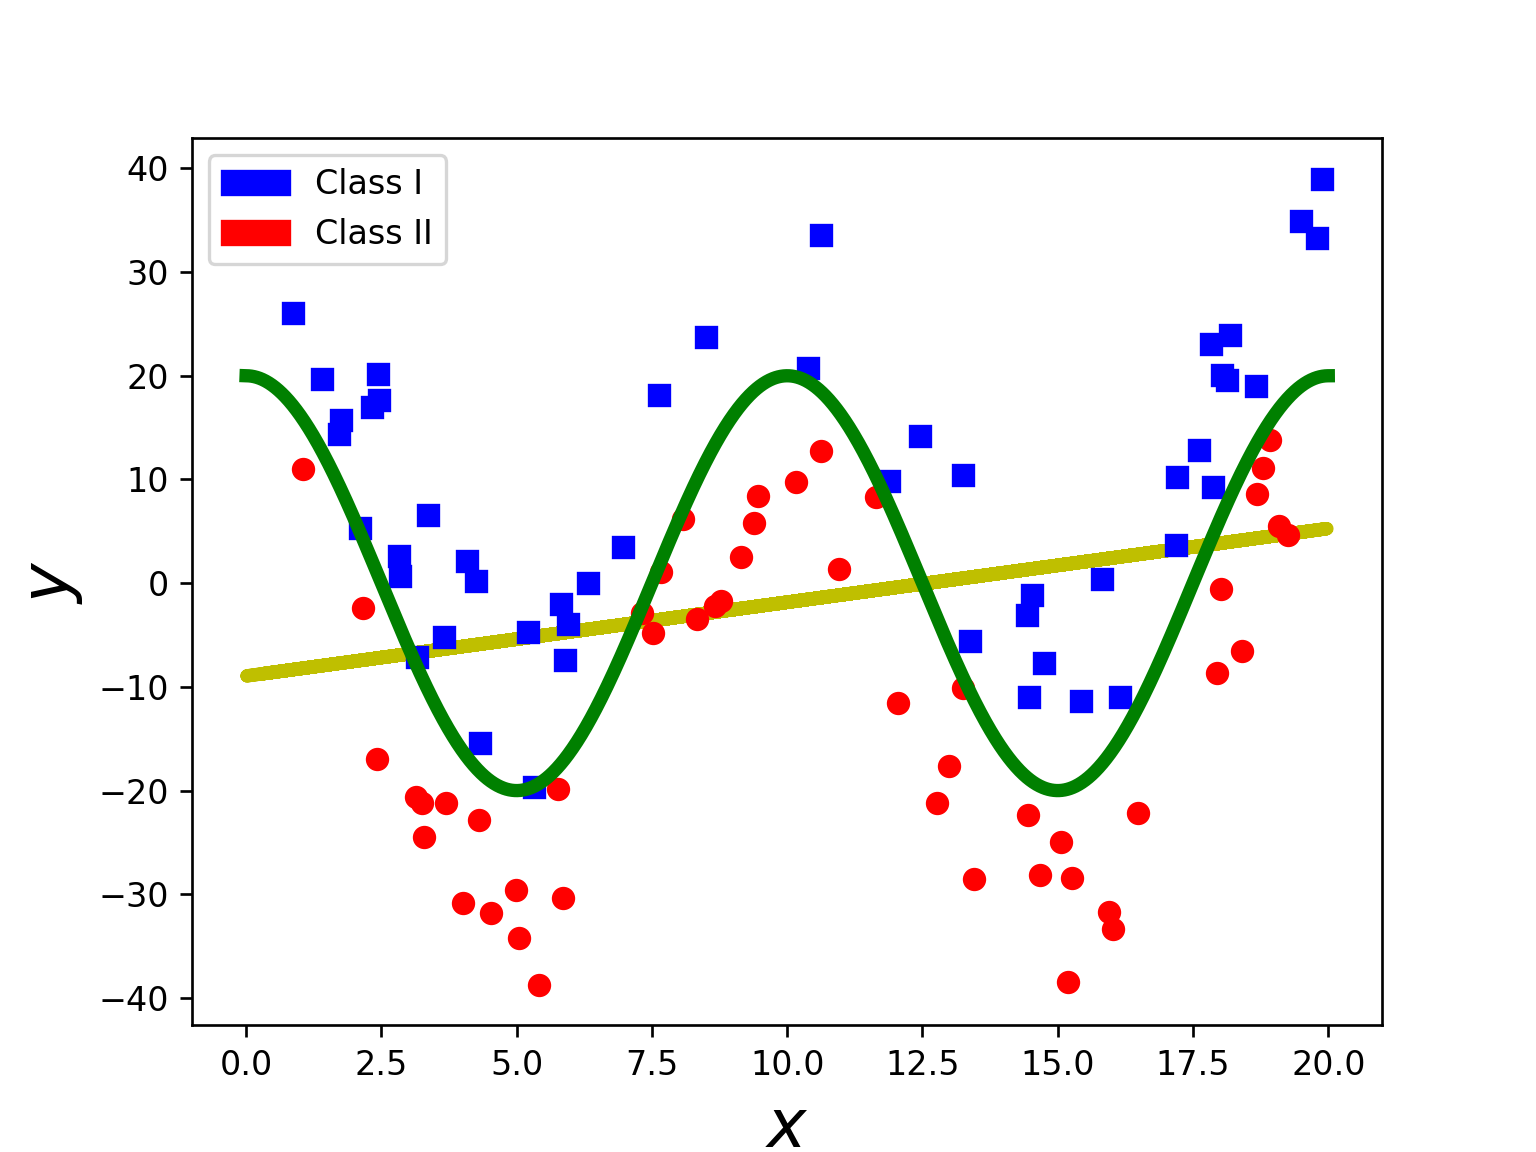

In [22]:
decision_function =  (-llda.intercept_ -llda.coef_[0][0] * x) / llda.coef_[0][1]
#print(llda_line)

plt.figure()
plt.plot(x, decision_function,'y', lw=4)
plt.plot(xA2, yA2, 'ro', lw=4)
plt.plot(xB2, yB2, 'bs', lw=4)

plt.plot(x2, y2,'g', lw=4)

blue_patch = mpatches.Patch(color='blue', label='Class I')
red_patch = mpatches.Patch(color='red', label='Class II')
plt.legend(handles=[blue_patch,red_patch])
plt.xlabel(r'$x$', fontsize=fsize)
plt.ylabel(r'$y$', fontsize=fsize)

plt.show()

We show a curve that makes a perfect separation of the data

<IPython.core.display.Javascript object>


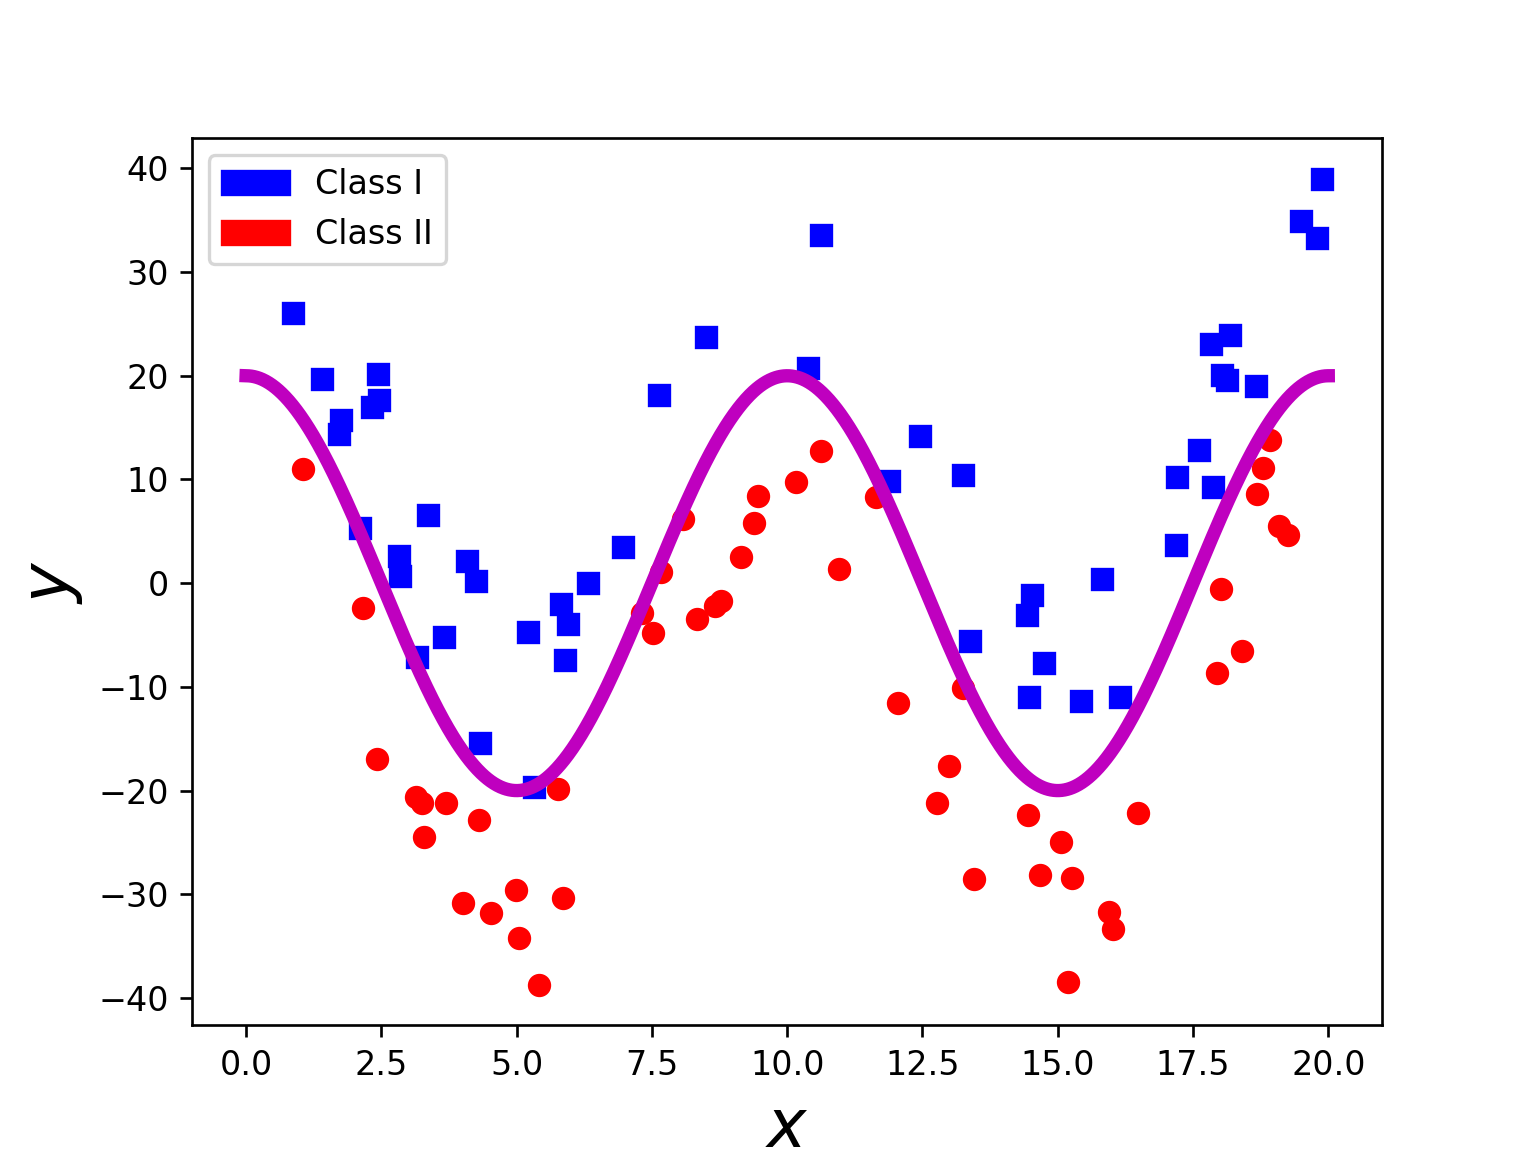

In [23]:
# Finally we also show a curve that makes a perfect separation of the data

plt.figure()

plt.plot(xA2, yA2, 'ro')
plt.plot(xB2, yB2, 'bs')

blue_patch = mpatches.Patch(color='blue', label='Class I')
red_patch = mpatches.Patch(color='red', label='Class II')
plt.legend(handles=[blue_patch,red_patch])

plt.xlabel(r'$x$', fontsize=fsize)
plt.ylabel(r'$y$', fontsize=fsize)


# Show the curve dividing the classes
plt.plot(x2, y2,'m', lw=4)
plt.show()



## EXERCISE 3


Implement a python function $myclassifier([XA,yA],[XB,yB])$ that given the sets of points for the two classes 
$(XA,yA)$ and $(XB,yB)$ determines the accuracy of the hyperplane $y=\frac{4+x}{2}$ to correctly predict the classes
of the points. 



In [25]:
# Example of the function definition. 
# Modify this code to implement your function

def myclassifier(point_classA,point_classB):    
   # Do something here with the points and the hyperplane
   # See the suggestion in the cell below
   # Compute the accuracy
   accuracy = 0
   return accuracy

def aux_class(xi,yi):
    


Suggestion: Create an auxiliary function $aux\_class(x_i,y_i)$ that for any point $(xi,yi)$ determines the sign of
 $(y_i-\frac{4+x_i}{2})$ and use this function to check in which region is the point located with respect to the hyperplane.
    

In [27]:
# Example of function evaluation with points corresponding to the classes
# of the previously analyzed problems.

accuracy_easy_problem = myclassifier([xA,yA],[xB,yB])
accuracy_overlapp_problem = myclassifier([xA1,yA1],[xB1,yB1])
accuracy_sine_problem = myclassifier([xA2,yA2],[xB2,yB2])

print("The accuraccies produced by the hyperplane for the three problems are, respectively,: "+str(accuracy_easy_problem)+", "
      +str(accuracy_overlapp_problem)+", and "+str(accuracy_sine_problem))


The accuraccies produced by the hyperplane for the three problems are, respectively,: 0, 0, and 0


## EXERCISE 4


Implement a new python function that computes the accuracy for curve:  $y=20 \frac{cos(x \pi)}{5}$.    

In [29]:
# Example of the new function definition. 
# Modify this code to implement your function

def myclassifier_cosine(point_classA,point_classB):    
   # Do something here with the points and the expression of the function   
   # Compute the accuracy
   accuracy = 0
   return accuracy




In [30]:
# Example of function evaluation with points corresponding to the classes
# of the previously analyzed problems.

accuracy_easy_problem = myclassifier_cosine([xA,yA],[xB,yB])
accuracy_overlapp_problem = myclassifier_cosine([xA1,yA1],[xB1,yB1])
accuracy_sine_problem = myclassifier_cosine([xA2,yA2],[xB2,yB2])

print("The accuraccies produced by the hyperplane for the three problems are, respectively,: "+str(accuracy_easy_problem)+", "
      +str(accuracy_overlapp_problem)+", and "+str(accuracy_sine_problem))

The accuraccies produced by the hyperplane for the three problems are, respectively,: 0, 0, and 0
